# Methodology for Data Science
_by Vytas Kereisis_

## Introduction

Brief overview of data science
Basic terminology
Workflow of a data science project
Python libraries overview (e.g., pandas, numpy, scikit-learn, matplotlib, seaborn)

### Python libraries overview

1. **pandas**: Used for data manipulation and analysis, providing powerful data structures like DataFrames.
2. **numpy**: Essential for performing mathematical and logical operations on arrays and matrices.
3. **sklearn (scikit-learn)**: A robust library for machine learning algorithms, model evaluation, and machine-learning pipelines.
4. **seaborn**: Built on top of `matplotlib`, it provides easy-to-use functions for creating informative and attractive visualizations.
5. **matplotlib**: A comprehensive library for creating static, animated, and interactive plots, serving as the foundation for other plotting libraries.ols.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
from pywaffle import Waffle
from wordcloud import WordCloud, STOPWORDS
import folium
import plotly.express as px
import dash
from dash import dcc
from dash import html
import datetime as dt
from sklearn.preprocessing import LabelEncoder

## Data Extraction

-Importing necessary libraries (pandas, sqlite3, requests, etc.)
-Loading CSV, Excel, JSON, SQL database (SQLite3), or API data
-Best practices for handling large datasets (chunking, sampling)

### API Requests

In [ ]:
import requests
import pandas as pd

def load_api_data_to_dataframe(url):
    """
    General function to make an API GET request and load JSON data into a Pandas DataFrame.   
    Args:
        url (str): The API URL to fetch data from.   
    Returns:
        pd.DataFrame: Data loaded into a Pandas DataFrame.
    """
    try:
        # Make the API request
        response = requests.get(url)     
        # Raise an error if the request failed
        response.raise_for_status()     
        # Parse the JSON response
        data = response.json()     
        # Convert to a Pandas DataFrame
        df = pd.json_normalize(data)
        # or
        # df = pd.DataFrame(data)     
        return df
    
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
    except Exception as err:
        print(f"An error occurred: {err}")
    
    return None  # Return None if there was an error

# Example usage
# Replace 'your_api_url' with the actual API endpoint you want to fetch data from
url = 'https://api.example.com/data'
df = load_api_data_to_dataframe(url)
# Display the DataFrame (if successfully loaded)
if df is not None:
    print(df.head())

### Web Scraping

#### General actions for web scraping

In [ ]:
import requests
from bs4 import BeautifulSoup

# Step 1: Make a request to the webpage
url = "https://example.com"  # Replace with the URL you want to scrape
response = requests.get(url)

# Step 2: Create a BeautifulSoup object to parse the HTML
soup = BeautifulSoup(response.content, "html.parser")

# Step 3: Extract and print the page title
page_title = soup.title.string  # This gets the title of the webpage
print("Page Title:", page_title)

# Step 4: Find and print all paragraph text on the page
paragraphs = soup.find_all('p')  # This finds all <p> tags (paragraphs)
for p in paragraphs:
    print(p.text)

# Step 5: Find and print all the links on the page
links = soup.find_all('a')  # This finds all <a> tags (links)
for link in links:
    print(link.get('href'))  # Get the URL from the href attribute

#### Table parsing from HTML file

In [ ]:
import requests
from bs4 import BeautifulSoup

def scrape_table(url):
  """Scrapes a table from a given URL using BeautifulSoup.

  Args:
    url: The URL of the webpage containing the table.

  Returns:
    A list of lists, where each inner list represents a row in the table, and each element in the inner list represents a cell in the row.
  """

  # Send a GET request to the URL
  response = requests.get(url)

  # Parse the HTML content using BeautifulSoup
  soup = BeautifulSoup(response.content, 'html.parser')

  # Find the table element
  table = soup.find('table')

  # Extract the table headers
  headers = [th.text.strip() for th in table.find('thead').find_all('th')]

  # Extract the table rows
  rows = []
  for row in table.find('tbody').find_all('tr'):
      cells = [cell.text.strip() for cell in row.find_all('td')]
      rows.append(cells)

  return headers, rows

# Example usage
url = 'https://example.com/table'
headers, rows = scrape_table(url)

# Print the extracted table
for header, row in zip(headers, rows):
  print(header, row)

#### Web scraping helper functions

In [ ]:
import requests
from bs4 import BeautifulSoup
import unicodedata

# Helper function to normalize and clean text
def clean_text(text):
    """
    Normalizes unicode characters and strips leading/trailing whitespace.
    
    Args:
    - text (str): The text to clean.

    Returns:
    - str: The cleaned text.
    """
    return unicodedata.normalize("NFKD", text).strip()

# Helper function to get BeautifulSoup object from a URL
def get_soup(url):
    """
    Sends a GET request to the URL and returns a BeautifulSoup object.

    Args:
    - url (str): The URL of the webpage to scrape.

    Returns:
    - BeautifulSoup: Parsed HTML content of the webpage.
    """
    response = requests.get(url)
    if response.status_code == 200:
        return BeautifulSoup(response.content, "html.parser")
    else:
        raise Exception(f"Failed to fetch page. Status code: {response.status_code}")

# Function to extract table data (for example, from a Wikipedia page)
def extract_table_data(soup, table_class):
    """
    Extracts data from a table on the webpage.

    Args:
    - soup (BeautifulSoup): The BeautifulSoup object of the webpage.
    - table_class (str): The class or identifier of the table to extract.

    Returns:
    - list of dict: Each dict represents a row of the table with column headers as keys.
    """
    table = soup.find("table", {"class": table_class})
    headers = [clean_text(th.text) for th in table.find_all("th")]
    rows = []

    # Iterate over table rows and extract data
    for row in table.find_all("tr")[1:]:
        cells = row.find_all(["td", "th"])
        row_data = {headers[i]: clean_text(cells[i].text) for i in range(len(cells))}
        rows.append(row_data)

    return rows

# Main function to scrape a Wikipedia page
def scrape_wikipedia(url, table_class="wikitable"):
    """
    Scrapes the specified table from a Wikipedia page.

    Args:
    - url (str): The URL of the Wikipedia page to scrape.
    - table_class (str, optional): The class of the table to scrape. Defaults to 'wikitable'.

    Returns:
    - list of dict: Data extracted from the table.
    """
    soup = get_soup(url)
    table_data = extract_table_data(soup, table_class)
    return table_data

# Example usage: scraping a table from a Wikipedia page
if __name__ == "__main__":
    wiki_url = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"
    data = scrape_wikipedia(wiki_url)

    # Print the first 5 rows of the extracted data
    for row in data[:5]:
        print(row)

### SQL Database

In [ ]:
import sqlite3

%load_ext sql
%sql sqlite:///mydatabase.db

def create_connection(db_file):
  """Create a connection to the SQLite database specified by db_file"""
  conn = None
  try:
    conn = sqlite3.connect(db_file)
    print(sqlite3.version)
  except Error as e:
    print(f"Error {e.args[0]}")
  return conn

import pandas as pd
import sqlite3

def load_csv_to_sqlite(csv_file, table_name, db_file):
  """Loads a CSV file into a SQLite database table.

  Args:
    csv_file: The path to the CSV file.
    table_name: The name of the SQLite table.
    db_file: The path to the SQLite database file.
  """

  # Read the CSV file into a pandas DataFrame
  df = pd.read_csv(csv_file)

  # Create a connection to the SQLite database
  conn = sqlite3.connect(db_file)

  # Write the DataFrame to the SQLite table
  df.to_sql(table_name, conn, index=False, if_exists='replace')

  # Close the database connection
  conn.close()

def close_connection(conn):
  """Close the database connection"""
  if conn:
    conn.close()

def execute_query(conn, sql):
  """Execute a SQL query"""
  try:
    cur = conn.cursor()
    cur.execute(sql)
    conn.commit()
    print("Query executed successfully")
  except Error as e:
    print(f"Error {e.args[0]}")

def fetch_all(conn, sql):
  """Fetch all rows from a SQL query"""
  try:
    cur = conn.cursor()
    cur.execute(sql)
    rows = cur.fetchall()
    return rows
  except Error as e:
    print(f"Error {e.args[0]}")

# Example usage (load csv file into sqlite databse table)
csv_file = 'data.csv'
table_name = 'my_table'
db_file = 'my_database.db'

load_csv_to_sqlite(csv_file, table_name, db_file)

# Example usage
db_file = "mydatabase.db"

# Create a connection to the database
conn = create_connection(db_file)

# Execute a SQL query to create a table
sql = """
CREATE TABLE IF NOT EXISTS customers (
    id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    address TEXT
);
"""
execute_query(conn, sql)

# Insert data into the table
sql = "INSERT INTO customers (name, address) VALUES ('Alice', '123 Main St')"
execute_query(conn, sql)

# Fetch all rows from the table
sql = "SELECT * FROM customers"
rows = fetch_all(conn, sql)
print(rows)

# Close the connection
close_connection(conn)

### SQL in Jupyter Notebooks

In [ ]:
-- Create a table
%%sql
CREATE TABLE customers (
    id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    address TEXT
);

-- Insert data into a table
%%sql
INSERT INTO customers (name, address) VALUES ('Alice', '123 Main St');

-- Select data from a table
%%sql
SELECT * FROM customers;

-- Update data in a table
%%sql
UPDATE customers SET address = '456 Oak St' WHERE id = 1;

-- Delete data from a table
%%sql
DELETE FROM customers WHERE id = 2;

-- Join two tables
%%sql
SELECT customers.name, orders.order_date
FROM customers
INNER JOIN orders ON customers.id = orders.customer_id;

-- Group data by a column
%%sql
SELECT country, COUNT(*) AS customer_count
FROM customers
GROUP BY country;

-- Aggregate functions (e.g., SUM, AVG, MIN, MAX)
%%sql
SELECT SUM(order_amount) AS total_sales
FROM orders;

-- Subqueries
%%sql
SELECT customer_name
FROM customers
WHERE id IN (SELECT customer_id FROM orders WHERE order_date > '2023-01-01');

## Data Cleaning and Transformation

-Handling missing data (dropna(), fillna())
-Duplicates removal (drop_duplicates())
-Type conversion (astype())
-Feature engineering (creating new columns, binning, encoding categorical variables)
-Data normalization and scaling (MinMaxScaler, StandardScaler)

If data is imported without headers, one can add headers like this.

In [ ]:
df = pd.read_csv(file_name, header=None)
headers = ['header_1', 'header_2', 'header_3']
df.columns = headers

Replacing unwanted values in dataset like ?, null, etc.

In [ ]:
# Replace the '?' (or other values with) entries with 'NaN' values.
df.replace('?', np.nan, inplace=True)

# Check for null values in columns
df.info()

# describe data
df.describe(include='all')

# For continuous attributes replacing with average
mean_value = df['header_1'].astype('float').mean(axis=0)
df['header_1'].replace(np.nan, mean_value, inplace=True)

# For categorical attributes replacing with most frequent value
most_frequent = df['header_2'].value_counts().idxmax()
df['header_2'].replace(np.nan, most_frequent, inplace=True)

# Update data types (for safety)
df[['header_1', 'header_2']] = df[['header_1', 'header_2']].astype('int')

# Check if there are no more null values
print(df.info())

# Drop rows with any NaN values
df_cleaned = df.dropna()

# To drop rows in place without creating a new DataFrame
df.dropna(inplace=True)

# Assuming your DataFrame is called df and the column is named 'column_name'
value_counts = df['column_name'].value_counts()
print(value_counts)

# Create a new column based on the 'class' column
# Populate or change one column of dataframe based on the value of another column. Similar
# to UPDATE ... WHERE clause in SQL
spacex_df['marker_color'] = spacex_df['class'].apply(lambda x: 'green' if x == 1 else 'red')

Round numerical values

In [ ]:
df[['header_1']] = np.round(df[['header_1']], 2)
print(df.head())

### Transform categorical DataFrame values to numerical using get_dummies

In [ ]:
import pandas as pd

def convert_categorical_to_numerical(df, categorical_columns):
  """Converts specified categorical columns in a DataFrame to numerical using One-Hot encoding.

  Args:
    df: The input DataFrame.
    categorical_columns: A list of column names to be encoded.

  Returns:
    A new DataFrame with the specified columns encoded as numerical.
  """

  # Apply One-Hot encoding to the specified columns
  df_encoded = pd.get_dummies(df, columns=categorical_columns)

  # Convert all columns to float64 data type
  df_encoded = df_encoded.astype('float64')

  return df_encoded

# Example usage
data = {'color': ['red', 'green', 'blue', 'red'],
        'size': ['small', 'medium', 'large', 'small']}
df = pd.DataFrame(data)

# Specify the categorical columns to be encoded
categorical_columns = ['color', 'size']

# Convert the categorical columns to numerical
df_encoded = convert_categorical_to_numerical(df, categorical_columns)

print(df_encoded)

Change objects and strings to numeric values

Unfortunately, Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using LabelEncoder to convert the categorical variable into numerical variables.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [ ]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

In this case, LabelEncoder will assign a 0 to the first unique value it encounters and a 1 to the second. If there are more categories, it will assign increasing integers.

## Exploratory Data Analysis (EDA)

Descriptive statistics (describe())
Checking distributions (histograms, boxplots)
Correlation analysis (corr())
Visualizing distributions with matplotlib and seaborn

### Pandas DataFrames

Select a specific row in dataframe (either indexed or labeled).

In [ ]:
df_can[df_can.index == 'row_name']

## Data Visualization

Line plots, scatter plots, bar plots, box plots
Advanced visualizations (pairplot, heatmap, swarmplot)
Customizing plots (colors, labels, titles)

Advice: if data is visualized not correctly, try to transpose the dataset.

### Line plot

In [ ]:
#Since we converted the years to string, 
#let's declare a variable that will allow us to easily call upon the full range of years:
years = list(map(str, range(1980, 2014)))
#creating data series
haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

#plotting line plot
haiti.index = haiti.index.map(int) 
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show()

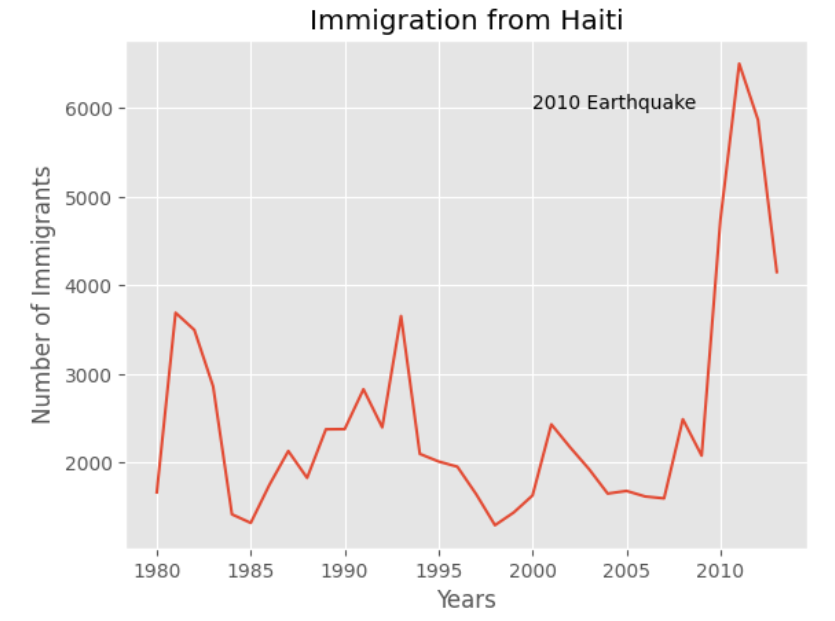

### Plotting directly with matplotlib (Line plot)

In [ ]:
#Create figure and axes
fig, ax = plt.subplots()

# Plot the line
ax.plot(total_immigrants, 
        marker='s', #Including markers in squares shapes
        markersize=5, #Setting the size of the marker
        color='green', #Changing the color of the line
        linestyle="dotted") #Changing the line style to a Dotted line

#Setting up the Title
ax.set_title('Immigrants between 1980 to 2013') 

#Setting up the Labels
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')

#limits on x-axis
plt.xlim(1975, 2015)  #or ax.set_xlim()

#Enabling Grid
plt.grid(True)  #or ax.grid()

#Legend
plt.legend(["Immigrants"]) #or ax.legend()

ax.annotate('2010 Earthquake',xy=(2000, 6000))

#Display the plot
plt.show()

### Scatter plot

In [ ]:
sns.regplot(x='header_1', y='header_2', data=df, line_kws={"color": "red"})
plt.ylim(0,)

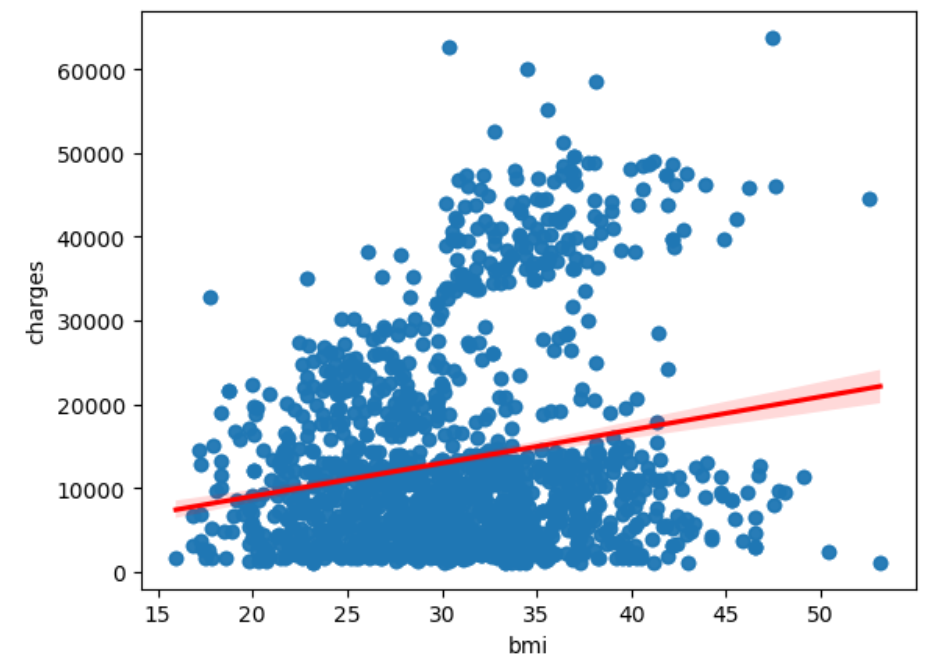

### Boxplot

In [ ]:
sns.boxplot(x="header_1", y="header_1", data=df)

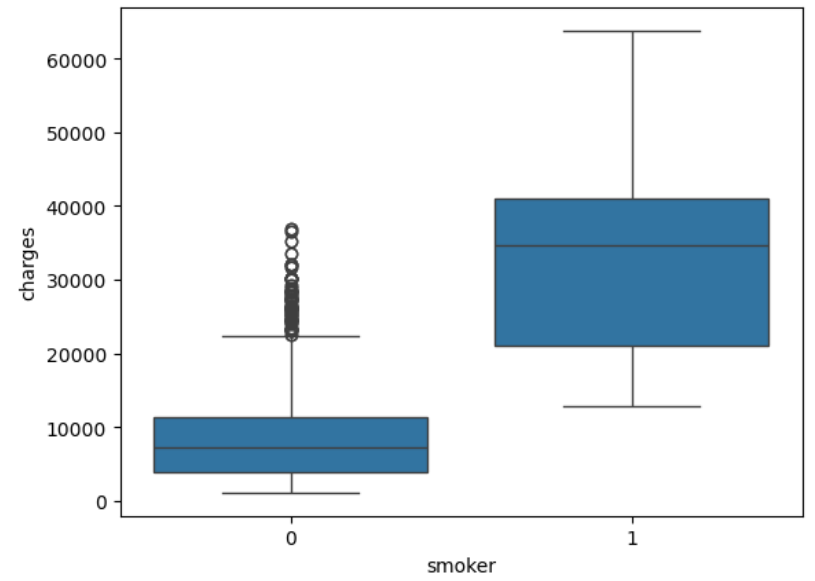

### Histograms

In [ ]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

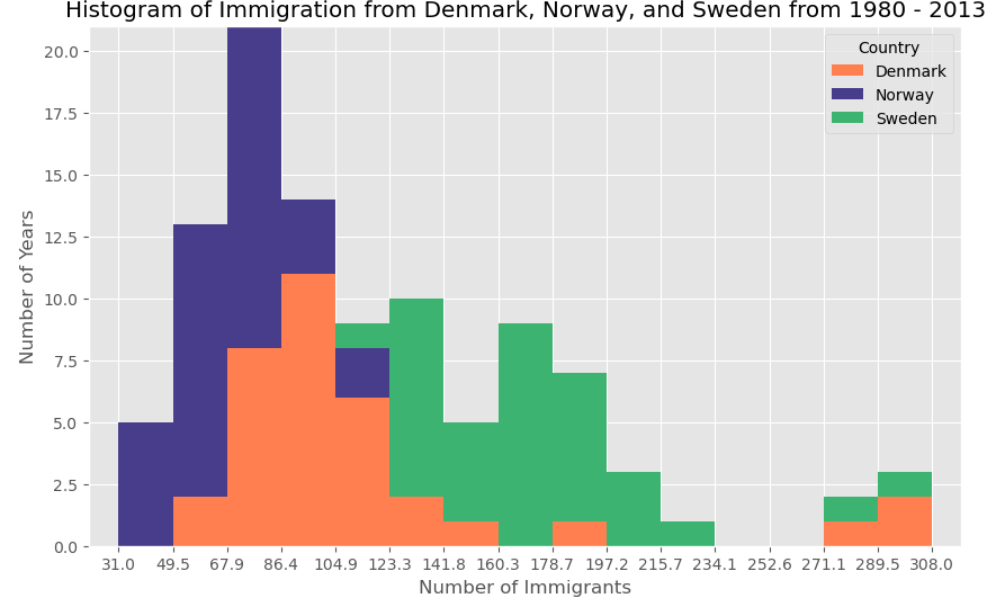

### Heatmap

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

### Barplots

In [ ]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

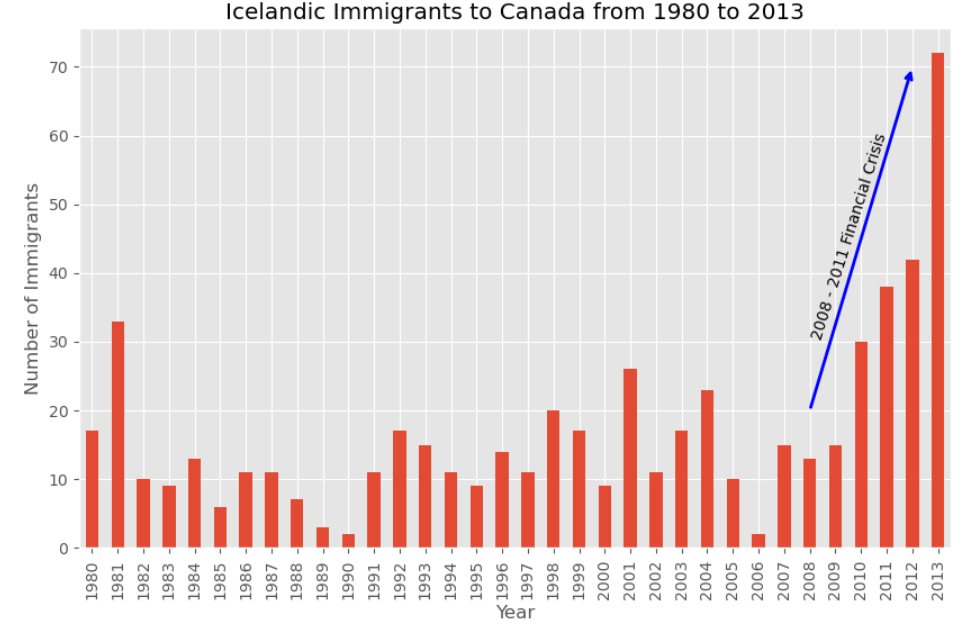

Horizontal barplot

In [ ]:
df_top15.plot(kind='barh',
              color='steelblue',
              figsize=(15, 10))

plt.title("Top 15 countries by immigration to Canada from 1980 to 2013")
plt.xlabel("Number of immigrants")

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()

### Treemaps

In [ ]:
import plotly.express as px
import pandas as pd
# Sales data
data = {
    'Category': ['Electronics', 'Electronics', 'Electronics', 
                 'Furniture', 'Furniture', 'Furniture', 
                 'Clothing', 'Clothing', 'Clothing'],
    'Subcategory': ['Laptops', 'Smartphones', 'Tablets', 
                    'Chairs', 'Tables', 'Sofas', 
                    'Men', 'Women', 'Kids'],
    'Sales': [120000, 80000, 30000, 
              50000, 40000, 20000, 
              70000, 90000, 40000]
}
df = pd.DataFrame(data)
# Creating the treemap
fig = px.treemap(
    df,
    path=['Category', 'Subcategory'],
    values='Sales',
    title='Sales Data Treemap'
)
fig.show()

### Pivot table and graph

In [ ]:
# Create pivot table
pivot_table = df.pivot_table(index='Date', columns=['Category','Subcategory'], values='Sales', aggfunc=np.sum)

# Plotting a pivot chart
pivot_table.plot(kind='bar', figsize=(14, 8))
plt.title('Sales Summary of IT Products by Category and Subcategory')
plt.xlabel('Quarters')
plt.ylabel('Total Sales')
plt.grid(False)
plt.legend(title=('Category', 'Subcategory'), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Pie charts

**Split** : Splitting the data into groups based on some criteria.
**Apply**: Applying a function to each group independently: .sum() .count() .mean() .std() .aggregate() .apply() .etc.. 
**Combine**: Combining the results into a data structure.

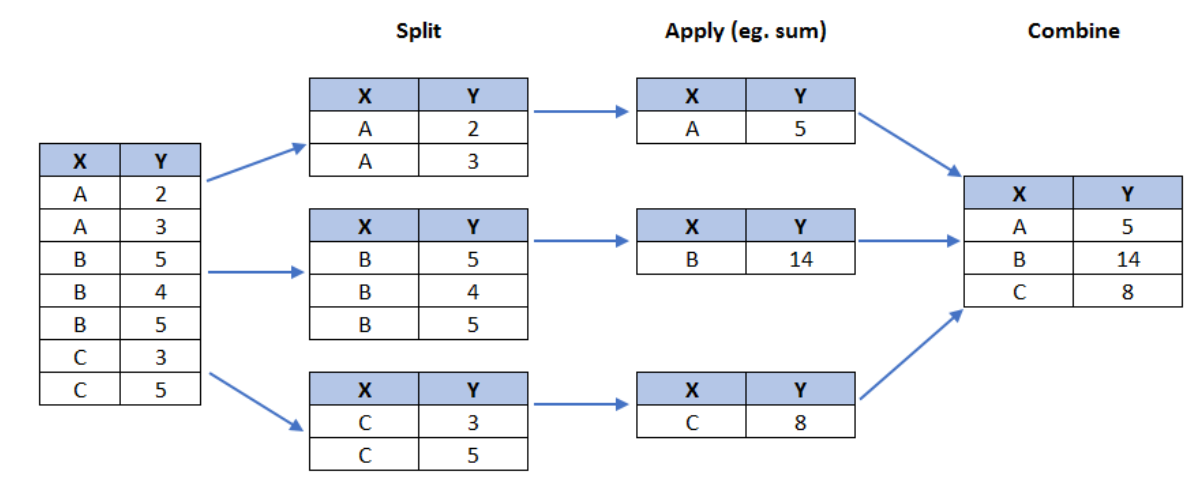

In [ ]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            #colors=colors_list,  # add custom colors
                            #explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12, fontsize = 15) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left', fontsize=7) 

plt.show()

### Multiple plots in one canvas

In [ ]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_cl.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_cl.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

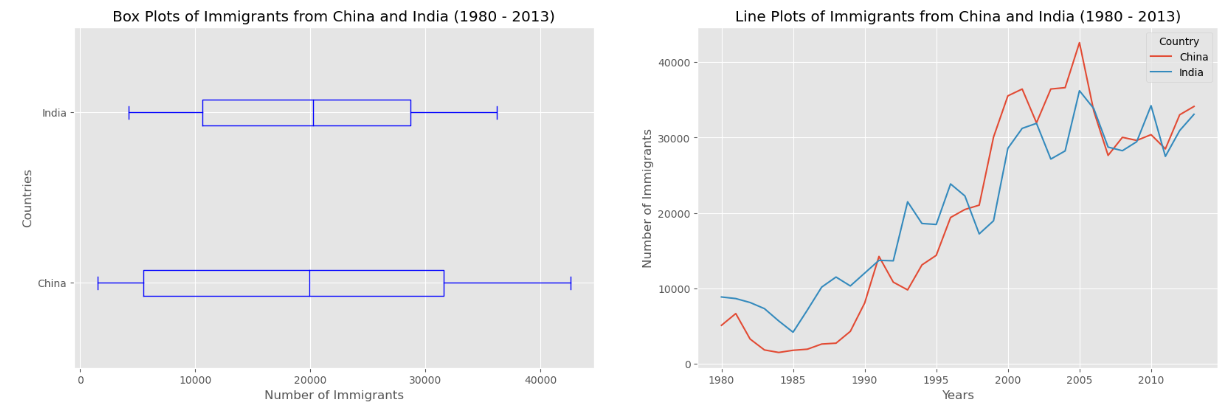

### Normalization and Bubble graph

In [ ]:
# transposed dataframe
df_can_t = df_can[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

In [ ]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

In [ ]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

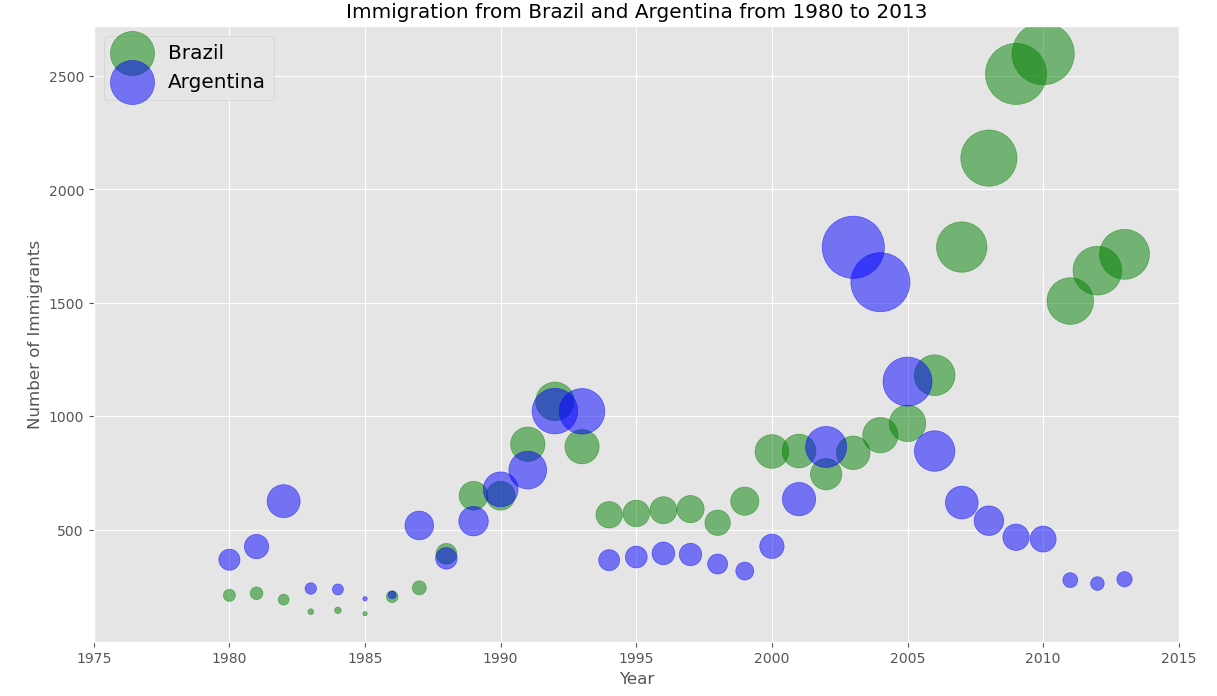

### Waffle chart

One can use a premade function to create such charts or use **pywaffle** library. This function as parameters takes:
> 1.  **categories**: Unique categories or classes in dataframe.
> 2.  **values**: Values corresponding to categories or classes.
> 3.  **height**: Defined height of waffle chart.
> 4.  **width**: Defined width of waffle chart.
> 5.  **colormap**: Colormap class
> 6.  **value_sign**: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. **value_sign** has a default value of empty string.

In [ ]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

In [ ]:
#import Waffle from pywaffle
from pywaffle import Waffle

#Set up the Waffle chart figure

fig = plt.figure(FigureClass = Waffle,
                 rows = 20, columns = 30, #pass the number of rows and columns for the waffle 
                 values = df_dsn['Total'], #pass the data to be used for display
                 cmap_name = 'tab20', #color scheme
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(df_dsn.index.values,df_dsn.Total)],
                            'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 3}
                 #notice the use of list comprehension for creating labels 
                 #from index and total of the dataset
                )

#Display the waffle chart
plt.show()

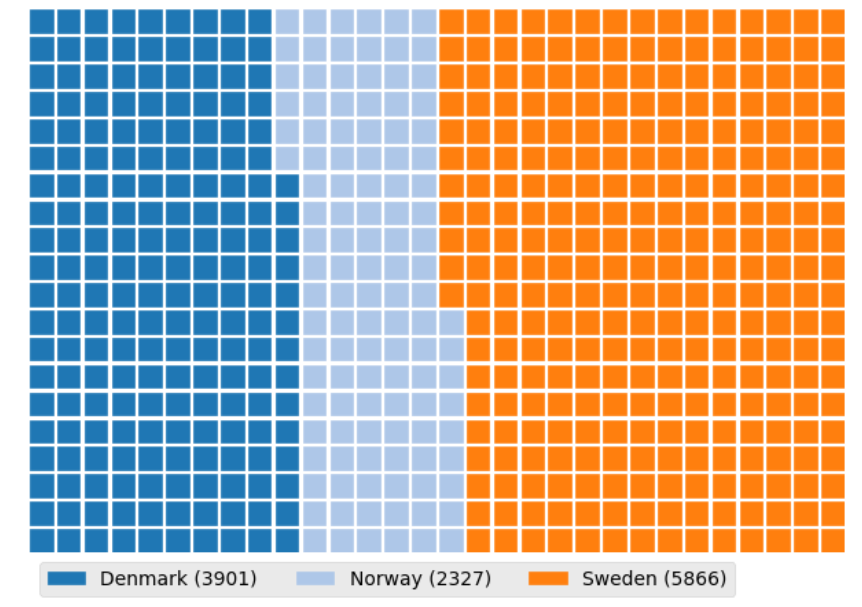

### Geospatial maps

In [ ]:
# define the world map centered around Canada with a higher zoom level
world_map = folium.Map(location=[56.130, -106.35], zoom_start=8)

# display world map
world_map

Add markers/features

In [ ]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.vector_layers.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

Calculate distance between two points and add line to folium map

In [ ]:
import folium
from math import sin, cos, sqrt, atan2, radians

# Step 1: Define the distance calculation function (Haversine formula)
def calculate_distance(lat1, lon1, lat2, lon2):
    # Approximate radius of Earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

# Step 2: Create a map object centered on a specific location
map_center = [37.7749, -122.4194]  # Example: San Francisco coordinates
mymap = folium.Map(location=map_center, zoom_start=12)

# Step 3: Define two points (latitude, longitude) for the line
point1 = [37.7749, -122.4194]  # San Francisco
point2 = [37.7849, -122.4094]  # Another location nearby

# Step 4: Calculate the distance using the custom function
distance = calculate_distance(point1[0], point1[1], point2[0], point2[1])
distance_str = f"{distance:.2f} km"  # Format the distance to 2 decimal places

# Step 5: Add a PolyLine between the two points
folium.PolyLine([point1, point2], color="blue", weight=2.5, opacity=1).add_to(mymap)

# Step 6: Add markers at the points
folium.Marker(location=point1, popup="Point 1: San Francisco").add_to(mymap)
folium.Marker(location=point2, popup="Point 2: Nearby").add_to(mymap)

# Step 7: Add a popup at the midpoint of the line to display the distance
mid_point = [(point1[0] + point2[0]) / 2, (point1[1] + point2[1]) / 2]  # Midpoint of the line
folium.Marker(location=mid_point, popup=f"Distance: {distance_str}").add_to(mymap)

# Step 8: Save the map to an HTML file and display it
mymap.save("map_with_custom_distance.html")

Add mouse position to folium map object

In [ ]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

### Choropleth Map

In [ ]:
# Calculate the total sales by city
sales_by_city = rec_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data= 'us-states.json',  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)


# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Display the map
map1

### Dash - creating a visualizations dashboard

In [ ]:
# Import required packages
import pandas as pd
import plotly.express as px
import dash
from dash import dcc
from dash import html

# Read the airline data into pandas dataframe
airline_data =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv', 
                            encoding = "ISO-8859-1",
                            dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})

# Randomly sample 500 data points. Setting the random state to be 42 so that we get same result.
data = airline_data.sample(n=500, random_state=42)

# Pie Chart Creation
fig = px.pie(data, values='Flights', names='DistanceGroup', title='Distance group proportion by flights')

# Create a dash application
app = dash.Dash(__name__)

# Get the layout of the application and adjust it.
# Create an outer division using html.Div and add title to the dashboard using html.H1 component
# Add description about the graph using HTML P (paragraph) component
# Finally, add graph component.
app.layout = html.Div(children=[html.H1(),
                                html.P(),
                                dcc.Graph(),
                                               
                    ])

# Run the application                   
if __name__ == '__main__':
    app.run_server()

Update title and description of pie graph in app.layout

In [ ]:
app.layout = html.Div(children=[html.H1('Airline Dashboard',style={'textAlign': 'center', 'color': '#503D36', 'font-size': 40}),
                                html.P('Proportion of distance group (250 mile distance interval group) by flights.', style={'textAlign':'center', 'color': '#F57241'}),
                                dcc.Graph(figure=fig),
                                               
                    ])

Interactive Dash application using callbacks and multiple graphs

In [ ]:
# Import required libraries
import pandas as pd
import plotly.graph_objects as go
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px

# Read the airline data into pandas dataframe
airline_data =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv', 
                            encoding = "ISO-8859-1",
                            dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})

# Create a dash application
app = dash.Dash(__name__)

# Build dash app layout
app.layout = html.Div(children=[html.H1('Flight Details Statistics Dashboard',style={'textAlign': 'center', 'color': '#503D36', 'font-size': 35}),
                                html.Div(["Input Year: ", dcc.Input(id='input-year', value='2010', 
                                type='number', style={'height':'35px', 'font-size': 30})],
                                style={'font-size': 30}),
                                html.Br(),
                                html.Br(), 
                                html.Div([
                                        html.Div(dcc.Graph(id='carrier-plot')),
                                        html.Div(dcc.Graph(id='weather-plot'))
                                ], style={'display': 'flex'}),
    
                                html.Div([
                                        html.Div(dcc.Graph(id='nas-plot')),
                                        html.Div(dcc.Graph(id='security-plot'))
                                ], style={'display': 'flex'}),
                                
                                html.Div(dcc.Graph(id='late-plot'), style={'width':'65%'})
                                ])

""" Compute_info function description

This function takes in airline data and selected year as an input and performs computation for creating charts and plots.

Arguments:
    airline_data: Input airline data.
    entered_year: Input year for which computation needs to be performed.
    
Returns:
    Computed average dataframes for carrier delay, weather delay, NAS delay, security delay, and late aircraft delay.

"""
def compute_info(airline_data, entered_year):
    # Select data
    df =  airline_data[airline_data['Year']==int(entered_year)]
    # Compute delay averages
    avg_car = df.groupby(['Month','Reporting_Airline'])['CarrierDelay'].mean().reset_index()
    avg_weather = df.groupby(['Month','Reporting_Airline'])['WeatherDelay'].mean().reset_index()
    avg_NAS = df.groupby(['Month','Reporting_Airline'])['NASDelay'].mean().reset_index()
    avg_sec = df.groupby(['Month','Reporting_Airline'])['SecurityDelay'].mean().reset_index()
    avg_late = df.groupby(['Month','Reporting_Airline'])['LateAircraftDelay'].mean().reset_index()
    return avg_car, avg_weather, avg_NAS, avg_sec, avg_late

# Callback decorator
@app.callback( [
               Output(component_id='carrier-plot', component_property='figure'),
               Output(component_id='weather-plot', component_property='figure'),
               Output(component_id='nas-plot', component_property='figure'),
               Output(component_id='security-plot', component_property='figure'),
               Output(component_id='late-plot', component_property='figure')
               ],
               Input(component_id='input-year', component_property='value'))

# Computation to callback function and return graph
def get_graph(entered_year):
    
    # Compute required information for creating graph from the data
    avg_car, avg_weather, avg_NAS, avg_sec, avg_late = compute_info(airline_data, entered_year)
            
    # Line plot for carrier delay
    carrier_fig = px.line(avg_car, x='Month', y='CarrierDelay', color='Reporting_Airline', title='Average carrier delay time (minutes) by airline')
    # Line plot for weather delay
    weather_fig = px.line(avg_weather, x='Month', y='WeatherDelay', color='Reporting_Airline', title='Average weather delay time (minutes) by airline')
    # Line plot for nas delay
    nas_fig = px.line(avg_NAS, x='Month', y='NASDelay', color='Reporting_Airline', title='Average NAS delay time (minutes) by airline')
    # Line plot for security delay
    sec_fig = px.line(avg_sec, x='Month', y='SecurityDelay', color='Reporting_Airline', title='Average security delay time (minutes) by airline')
    # Line plot for late aircraft delay
    late_fig = px.line(avg_late, x='Month', y='LateAircraftDelay', color='Reporting_Airline', title='Average late delay time (minutes) by airline')
            
    return[carrier_fig, weather_fig, nas_fig, sec_fig, late_fig]

# Run the app
if __name__ == '__main__':
    app.run_server()

## Statistical Analysis

Hypothesis testing (t-test, chi-square test)
Confidence intervals
Basic statistical metrics: mean, median, mode, variance, standard deviation

**R-squared**, also called the **coefficient of determination**, measures the proportion of variance in the dependent variable that is explained by the independent variable(s) in a regression model. It ranges from 0 to 1, where 0 means no variance is explained and 1 indicates that all variance is perfectly explained by the model.

**The Pearson correlation coefficient** measures the linear relationship between two variables, ranging from -1 to 1. A value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no linear relationship.

In [ ]:
# imports
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

## Introduction to Machine Learning

Overview of supervised vs unsupervised learning
Importing scikit-learn and model-building process
Model types: regression, classification, clustering

## Feature Selection and Engineering

Selecting important features (SelectKBest, recursive feature elimination)
Principal Component Analysis (PCA)

## Modeling (ML)

Regression:
Linear regression, decision tree, random forest
Classification:
Logistic regression, SVM, k-nearest neighbors, random forest, decision trees
Clustering:
K-means, hierarchical clustering

### Linear Regression

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Independent variable
y = np.array([2, 4, 5, 4, 5])  # Dependent variable

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Print model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")

# Calculate MSE and R^2
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Plot the data and regression line
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Fitted line')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Multiple Regression

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample data (with two predictors)
data = {
    'X1': [1, 2, 3, 4, 5],  # First predictor
    'X2': [2, 4, 6, 8, 10],  # Second predictor
    'y': [3, 5, 7, 9, 11]  # Dependent variable
}

# Create a DataFrame
df = pd.DataFrame(data)

# Independent variables (predictors)
X = df[['X1', 'X2']]

# Dependent variable
y = df['y']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Print model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

# Calculate MSE and R^2
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Since we can't easily visualize in higher dimensions, let's check the results in tabular form
comparison = pd.DataFrame({
    'Actual': y,
    'Predicted': y_pred
})
print(comparison)

### **Classification algorithms**

### K-nearest neighbour (KNN)

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score, accuracy_score

# Function to train and evaluate KNN model
def knn_model(X, y, k=5):
    """
    Trains and evaluates a KNN model with a given K value.
    Args:
    - X: Features (independent variables)
    - y: Target (dependent variable)
    - k: Number of neighbors (K value)

    Returns:
    - model: Trained KNN model
    - y_pred: Predictions on the test set
    - jaccard: Jaccard index score
    """
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the KNN model
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate Jaccard Index
    jaccard = jaccard_score(y_test, y_pred, average='macro')
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"K = {k}")
    print(f"Jaccard Index: {jaccard:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    
    return model, y_pred, jaccard

# Function to test model for different K values
def test_knn_for_different_k(X, y, k_values=[3, 5, 7, 9]):
    """
    Tests the KNN model for different values of K.
    Args:
    - X: Features (independent variables)
    - y: Target (dependent variable)
    - k_values: List of K values to test
    
    Returns:
    - results: Dictionary with K values and corresponding Jaccard Index scores
    """
    results = {}
    for k in k_values:
        _, _, jaccard = knn_model(X, y, k=k)
        results[k] = jaccard
    return results

# Example usage (replace with your own data)
# Sample data
data = {
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    'target': [0, 0, 0, 0, 1, 1, 1, 1, 0, 1]
}

# Create DataFrame
df = pd.DataFrame(data)

# Features (X) and target (y)
X = df[['feature1', 'feature2']]  # Independent variables
y = df['target']  # Dependent variable

# Test for different K values
k_values = [3, 5, 7]
results = test_knn_for_different_k(X, y, k_values)

# Print results
print("\nJaccard Index for different K values:")
for k, jaccard in results.items():
    print(f"K = {k}: Jaccard Index = {jaccard:.4f}")

### Decision Trees

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

# Function to build and evaluate a Decision Tree model
def decision_tree_model(X, y, max_depth=None, criterion='gini', random_state=42):
    """
    Builds and evaluates a Decision Tree classifier.
    
    Args:
    - X: Features (independent variables)
    - y: Target (dependent variable)
    - max_depth: Maximum depth of the tree (default: None for full depth)
    - criterion: Criterion to split the tree ('gini' or 'entropy')
    - random_state: Seed for reproducibility
    
    Returns:
    - model: Trained Decision Tree model
    """
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    
    # Create Decision Tree classifier
    model = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, random_state=random_state)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = metrics.accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)
    
    return model, y_test, y_pred

# Function to visualize the Decision Tree
def visualize_decision_tree(model, feature_names=None):
    """
    Visualizes a trained Decision Tree model.
    
    Args:
    - model: Trained Decision Tree model
    - feature_names: List of feature names (optional)
    """
    
    # Plot the decision tree
    plt.figure(figsize=(12,8))
    plot_tree(model, filled=True, feature_names=feature_names, class_names=True, rounded=True)
    plt.show()
    
    # Print the text representation of the tree
    tree_text = export_text(model, feature_names=feature_names)
    print(tree_text)

# Example usage (replace with your own data)
# Sample data (replace this with actual dataset)
data = {
    'feature1': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'feature2': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    'target': [0, 0, 0, 1, 1, 1, 0, 1, 1, 0]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define features (X) and target (y)
X = df[['feature1', 'feature2']]  # Independent variables
y = df['target']  # Dependent variable

# Build and evaluate Decision Tree model
model, y_test, y_pred = decision_tree_model(X, y, max_depth=3, criterion='gini')

# Visualize the Decision Tree
visualize_decision_tree(model, feature_names=X.columns)

### Logistic Regression

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, jaccard_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace with your own data)
# df = pd.read_csv('your_dataset.csv')

# For demonstration, creating a dummy dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model evaluation functions

# 1. Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# 2. Jaccard Index
def jaccard_index(y_true, y_pred):
    return jaccard_score(y_true, y_pred)

# 3. Classification Report
def classification_report_print(y_true, y_pred):
    print(classification_report(y_true, y_pred))

# Evaluate the model
plot_confusion_matrix(y_test, y_pred)
print(f"Jaccard Index: {jaccard_index(y_test, y_pred):.2f}")
classification_report_print(y_test, y_pred)

# Optional: Check model accuracy
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

### Support Vector Machine

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# Replace this with your dataset
# df = pd.read_csv('your_data.csv')

# Example using synthetic data
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# More detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: Plotting the decision boundary (only works for 2D data)
# from matplotlib.colors import ListedColormap
# X_set, y_set = X_train[:, [0, 1]], y_train  # Choose 2 features for 2D plot
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
#                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, svm_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#                 c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('SVM (Training set)')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend()
# plt.show()

### Softmax Regression (Multinomial Logistic Regression)

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# Replace this with your dataset
# df = pd.read_csv('your_data.csv')

# Example using synthetic multi-class data
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_clusters_per_class=1, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Softmax Regression (multinomial logistic regression) model
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
softmax_model.fit(X_train, y_train)

# Make predictions
y_pred = softmax_model.predict(X_test)

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Softmax Regression')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Display the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# More detailed report
print("\nClassification Report - Softmax Regression:")
print(classification_report(y_test, y_pred))

### One-vs-All (OvA) Strategy with Logistic Regression

In [ ]:
# Initialize and train One-vs-All Logistic Regression
ova_model = LogisticRegression(multi_class='ovr', random_state=42)
ova_model.fit(X_train, y_train)

# Make predictions
y_pred = ova_model.predict(X_test)

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - One-vs-All')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Display the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# More detailed report
print("\nClassification Report - One-vs-All:")
print(classification_report(y_test, y_pred))

### One-vs-One (OvO) Strategy with Support Vector Machine

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC

# Initialize and train One-vs-One SVM model
ovo_model = OneVsOneClassifier(SVC(kernel='linear', random_state=42))
ovo_model.fit(X_train, y_train)

# Make predictions
y_pred = ovo_model.predict(X_test)

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - One-vs-One')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Display the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# More detailed report
print("\nClassification Report - One-vs-One:")
print(classification_report(y_test, y_pred))

### Polynomial regression with Ridge model

In [ ]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RR.fit(x_train_pr, y_train)
yhat = RR.predict(x_test_pr)
print(r2_score(y_test, yhat))

### Clustering algorithms

#### K-Means

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace with your dataset)
# df = pd.read_csv('your_dataset.csv')

# For demonstration, create a sample dataset
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Fit K-means clustering model
def kmeans_clustering(X, n_clusters=4, random_state=42):
    """Fit K-Means clustering model."""
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    y_kmeans = kmeans.fit_predict(X)
    return kmeans, y_kmeans

# Plot clustering results
def plot_clusters(X, y_kmeans, kmeans):
    """Plot K-Means clustering results."""
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_kmeans, palette="Set2", s=100, alpha=0.6)
    # Plot the cluster centers
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroids')
    plt.title('K-Means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Elbow Method for Optimal K
def elbow_method(X, max_clusters=10):
    """Plot the Elbow Method to find optimal K."""
    inertia = []
    for k in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters+1), inertia, 'bo-', markersize=8)
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Inertia')
    plt.show()

# Silhouette Score for Evaluation
def silhouette_evaluation(X, y_kmeans):
    """Evaluate K-Means using silhouette score."""
    score = silhouette_score(X, y_kmeans)
    print(f'Silhouette Score: {score:.2f}')

# Run K-Means and plot results
kmeans, y_kmeans = kmeans_clustering(X, n_clusters=4)
plot_clusters(X, y_kmeans, kmeans)

# Evaluate the model
silhouette_evaluation(X, y_kmeans)

# Optional: Use the Elbow Method to determine the best number of clusters
elbow_method(X, max_clusters=10)

### Pipeline

In [80]:
Input = [('scaler', StandardScaler()),('polynomial', PolynomialFeatures()), ('linear', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(x_data, y_data)
print(pipe.score(x_data, y_data))

NameError: name 'StandardScaler' is not defined

## Model Evaluation

Train-test split, cross-validation
Evaluation metrics:
Regression: RMSE, R-squared
Classification: Accuracy, precision, recall, F1-score, ROC-AUC

### Train-test split, cross-validation

In [ ]:
from sklearn.model_selection import train_test_split

y_data = df['depend_var']
x_data = df['indep_var']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

Cross-validation helps solve this by splitting your data multiple times in different ways, and it averages the performance across these splits.

In [ ]:
from sklearn.model_selection import cross_val_score

lr=LinearRegression()
lr.fit(x_train1[['indep_var']], y_train)

Rcross = cross_val_score(lr, x_data[['indep_var']], y_data, cv=4)

print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

yhat_train = lr.predict(x_train[['indep_var']])

# check how accurate is model in predicting values compared to actual values. Comparing train dataset values.
Title = 'Distribution Plot of Predicted Value Using Training Data (blue) vs Training Data Distribution (red)'
DistributionPlot(y_train, yhat_train, "Actual Values - red (Train)", "Predicted Values - blue (Train)", Title)

Example of creating polynomial model (for more complex relations) and training it.

In [ ]:
pr = PolynomialFeatures(degree=5)

# creates a new x_train_pr dataset where indep_var has been expanded into several new columns: indep_var, indep_var^2, indep_var^3, etc. up to horsepower^5
x_train_pr = pr.fit_transform(x_train[['indep_var']])
x_test_pr = pr.fit_transform(x_test[['indep_var']])

poly = LinearRegression()
poly.fit(x_train_pr, y_train)

Template to check how the R^2 changes on the test data for different order polynomials and then plot the results. Update order array for different polynomial degrees.

In [ ]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['indep_var']])
    
    x_test_pr = pr.fit_transform(x_test[['indep_var']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

## Hyperparameter Tuning

### Ridge model

__Ridge regression__ is a regularized version of linear regression. In standard linear regression, the goal is to find the best-fit line that minimizes the sum of squared errors between the actual values and the predicted values. However, in some cases, linear regression can overfit the data, meaning it performs very well on the training data but poorly on unseen (test) data.

To combat this, Ridge regression adds a penalty to the linear model's coefficients (weights). This penalty term, controlled by a parameter called __alpha__, helps shrink the coefficients, making the model less complex and more generalizable to new data.

In [ ]:
from sklearn.linear_model import Ridge

RigeModel=Ridge(alpha=1)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test, y_test)
yhat = RigeModel.predict(x_test_pr)

Select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far (this template and plotting template below could be made into functions).

In [ ]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

Plotting results on different alphas. The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

### Grid search (GridSearchCV)

The term alpha is a hyperparameter. Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

Use Grid Search to find the correct alpha value for which the Ridge regression model gives the best performance.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Logistic Regression for demonstration
from sklearn.linear_model import LogisticRegression

# Load your dataset
# Replace this with your dataset
# df = pd.read_csv('your_data.csv')

# Example using synthetic data
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_clusters_per_class=1, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional, depending on the algorithm)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],            # Regularization strength
    'penalty': ['l2'],                  # Regularization type
    'solver': ['lbfgs', 'saga'],        # Optimization algorithm
    'max_iter': [100, 200]              # Maximum iterations
}

# Initialize the model (example: Logistic Regression)
model = LogisticRegression(multi_class='multinomial', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearch
print(f"Best Parameters: {grid_search.best_params_}")

# Make predictions with the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Evaluation Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#### Collection of parameter grids for GridSearchCV

In [ ]:
# Logistic Regression
logistic_params = {
    'C': [0.01, 0.1, 1, 10],           # Inverse of regularization strength (smaller values specify stronger regularization)
    'penalty': ['l2'],                 # Regularization norm, 'l2' is supported for all solvers
    'solver': ['lbfgs', 'saga'],       # Optimization algorithm to use; 'lbfgs' is default, 'saga' supports large datasets
    'max_iter': [100, 200, 300]        # Maximum number of iterations to converge
}

# Support Vector Classifier (SVC)
svc_params = {
    'C': [0.1, 1, 10],                 # Regularization parameter, higher values result in less regularization
    'kernel': ['linear', 'rbf', 'poly'], # Specifies the kernel type; 'linear', 'rbf' (Gaussian), and 'poly' (polynomial)
    'gamma': ['scale', 'auto'],         # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'; 'scale' is default
    'degree': [2, 3, 4],                # Degree of polynomial kernel (only used if kernel='poly')
    'class_weight': [None, 'balanced']  # Adjusts class weight inversely proportional to class frequencies
}

# Decision Tree Classifier
decision_tree_params = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Function to measure the quality of a split
    'splitter': ['best', 'random'],                # The strategy used to split at each node
    'max_depth': [None, 10, 20, 30],               # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],               # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 5],                 # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2']         # The number of features to consider when looking for the best split
}

# Random Forest Classifier
random_forest_params = {
    'n_estimators': [100, 200, 300],               # Number of trees in the forest
    'criterion': ['gini', 'entropy'],              # Function to measure the quality of a split
    'max_depth': [None, 10, 20],                   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],               # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],                 # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                     # Whether bootstrap samples are used when building trees
}

# K-Nearest Neighbors (KNN)
knn_params = {
    'n_neighbors': [3, 5, 7, 9],                   # Number of neighbors to use
    'weights': ['uniform', 'distance'],            # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm to compute nearest neighbors
    'p': [1, 2]                                    # Power parameter for the Minkowski distance; p=1 is Manhattan, p=2 is Euclidean
}

# Gradient Boosting Classifier
gradient_boosting_params = {
    'n_estimators': [100, 200, 300],               # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],             # Shrinks contribution of each tree
    'max_depth': [3, 5, 7],                        # Maximum depth of the individual regression estimators
    'subsample': [0.6, 0.8, 1.0],                 # Fraction of samples used for fitting individual base learners
    'min_samples_split': [2, 5],                   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]                     # Minimum number of samples required to be at a leaf node
}

# XGBoost Classifier
xgboost_params = {
    'n_estimators': [100, 200, 300],               # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],             # Step size shrinkage
    'max_depth': [3, 5, 7],                        # Maximum depth of a tree
    'subsample': [0.6, 0.8, 1.0],                 # Subsample ratio of the training instance
    'colsample_bytree': [0.6, 0.8, 1.0],           # Subsample ratio of columns when constructing each tree
    'gamma': [0, 1, 5],                            # Minimum loss reduction required to make a further partition on a leaf node
    'reg_lambda': [0.01, 0.1, 1]                   # L2 regularization term on weights
}

# Multi-layer Perceptron (MLP) Classifier
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],  # Number of neurons in the ith hidden layer
    'activation': ['relu', 'tanh', 'logistic'],        # Activation function for the hidden layer
    'solver': ['adam', 'sgd', 'lbfgs'],                # Optimizer for weight updating
    'alpha': [0.0001, 0.001, 0.01],                    # L2 penalty (regularization term)
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate schedule for weight updates
    'max_iter': [200, 300, 400]                        # Maximum number of iterations
}

### Random search (RandomizedSearchCV)

## Project Structure and Best Practices

Organizing a data science project
Version control with Git
Documenting code and creating reproducible workflows

## References and Resources

Links to online resources (cheat sheets, tutorials, courses)
Best practices in data science